In [1]:
# import libraries
import math
import csv
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# read data
data = pd.read_csv("Integrated.csv")
data
feats = data.values[:,1:]
feats

# performing KMeans algorithm
kmean = KMeans(n_clusters=6, random_state=100).fit(feats)
cluster = kmean.labels_+1
data['cluster'] = cluster
data
#data = np.append(data, cluster, 1)

# creating clusters
cluster1 = data[data['cluster']==1]

cluster2 = data[data['cluster']==2]

cluster3 = data[data['cluster']==3]

cluster4 = data[data['cluster']==4]

cluster5 = data[data['cluster']==5]

cluster6 = data[data['cluster']==6]



In [3]:

#######################################################################################


# plot time series data; remove the proteins names, tranpose to make x=day, y=value
cluster1 = cluster1.drop(columns=['day', 'cluster'])
c1 = cluster1.T
c1

cluster2 = cluster2.drop(columns=['day', 'cluster'])
c2 = cluster2.T
c2

cluster3 = cluster3.drop(columns=['day', 'cluster'])
c3 = cluster3.T
c3

cluster4 = cluster4.drop(columns=['day', 'cluster'])
c4 = cluster4.T
c4

cluster5 = cluster5.drop(columns=['day', 'cluster'])
c5 = cluster5.T
c5

cluster6 = cluster6.drop(columns=['day', 'cluster'])
c6 = cluster6.T
c6

cluster_len = [len(cluster1),len(cluster2),len(cluster3),len(cluster4),len(cluster5),len(cluster6)]
cluster_len

# for ci, i = 1:6,
# row = days, col = the protein 

[672, 711, 509, 807, 560, 733]

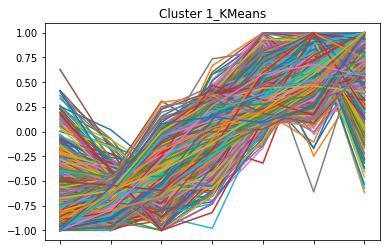

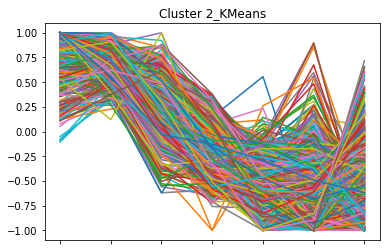

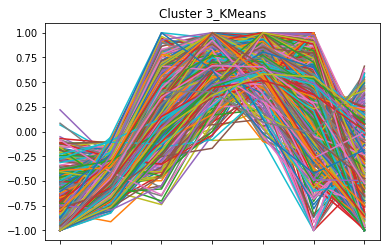

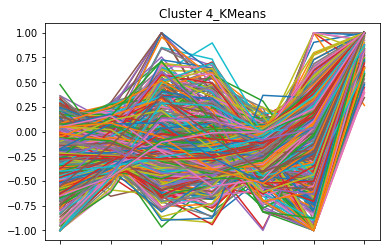

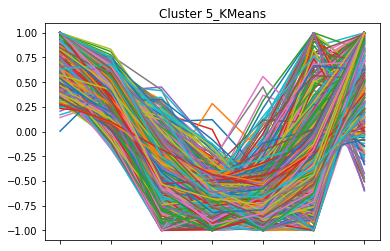

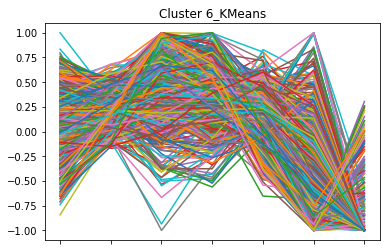

In [4]:
# plotting and saving the trends within each cluster

c1.plot(kind='line', legend=False)
plt.title('Cluster 1_KMeans')
plt.savefig('KMeans_cluster1.png')

c2.plot(kind='line', legend=False)
plt.title('Cluster 2_KMeans')
plt.savefig('KMeans_cluster2.png')

c3.plot(kind='line', legend=False)
plt.title('Cluster 3_KMeans')
plt.savefig('KMeans_cluster3.png')

c4.plot(kind='line', legend=False)
plt.title('Cluster 4_KMeans')
plt.savefig('KMeans_cluster4.png')

c5.plot(kind='line', legend=False)
plt.title('Cluster 5_KMeans')
plt.savefig('KMeans_cluster5.png')

c6.plot(kind='line', legend=False)
plt.title('Cluster 6_KMeans')
plt.savefig('KMeans_cluster6.png')

In [ ]:
# - validating results:
#     - validating k-means:
#         - elbow method
#         - silhouette analysis
#     - only able to confirm that clusters are meaningful via biological database lookup
# - pattern clustering:
#     - so far no python packages, only papers with mathematical equations
# - gmm:
#     - does this count as distribution?
#     - can alg recognize not non-distinct clusters?
# - hierarchal clustering
#     - package in r
#     - how would results turn out?? would they be too specific or?
    
    
# - validating k means:
#     - plot center for each day (i.e. average value for days 0 1 3 5 7 10 14)
#     - calculate loss by measuring L2 distance between values and centroid for each day
#     - sum the loss for days, then loss for proteins and divide by total proteins to get average
#     - each day & cluster has a loss

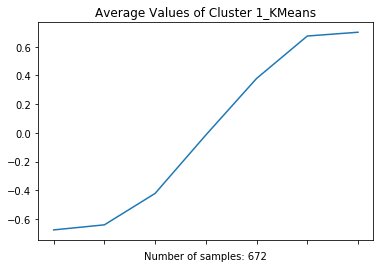

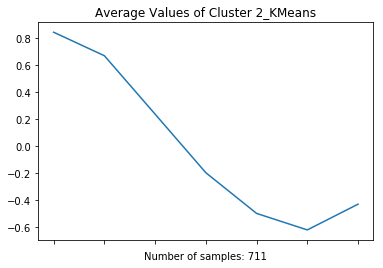

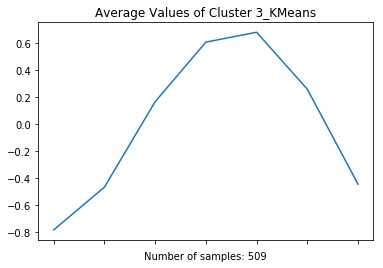

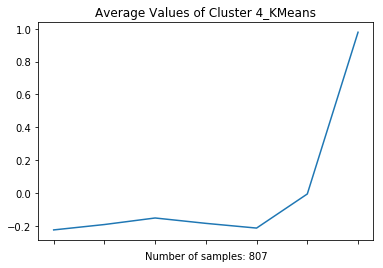

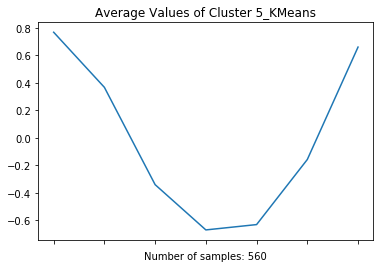

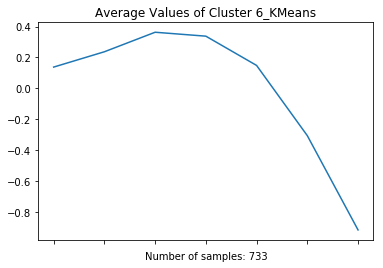

In [5]:
#plot center for each day (i.e. average value for days 0 1 3 5 7 10 14)
#how to do: take average value in each column

plt.figure(1) 
avg_c1 = np.mean(cluster1,axis=0)
avg_c1
avg_c1.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 1_KMeans')
plt.xlabel('Number of samples: 672' )
plt.savefig('KMeans_avg_cluster1.png')

plt.figure(2) 
avg_c2 = np.mean(cluster2,axis=0)
avg_c2
avg_c2.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 2_KMeans')
plt.xlabel('Number of samples: 711' )
plt.savefig('KMeans_avg_cluster2.png')

plt.figure(3) 
avg_c3 = np.mean(cluster3,axis=0)
avg_c3
avg_c3.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 3_KMeans')
plt.xlabel('Number of samples: 509' )
plt.savefig('KMeans_avg_cluster3.png')

plt.figure(4) 
avg_c4 = np.mean(cluster4,axis=0)
avg_c4
avg_c4.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 4_KMeans')
plt.xlabel('Number of samples: 807' )
plt.savefig('KMeans_avg_cluster4.png')

plt.figure(5) 
avg_c5 = np.mean(cluster5,axis=0)
avg_c5
avg_c5.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 5_KMeans')
plt.xlabel('Number of samples: 560' )
plt.savefig('KMeans_avg_cluster5.png')

plt.figure(6) 
avg_c6 = np.mean(cluster6,axis=0)
avg_c6
avg_c6.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 6_KMeans')
plt.xlabel('Number of samples: 733' )
plt.savefig('KMeans_avg_cluster6.png')

In [41]:
#     - calculate loss by measuring L2 distance between values and centroid for each day
#     - sum the loss for days, then loss for proteins and divide by total proteins to get average
#     - each day & cluster has a loss

# HOW TO DO:
#   - save sum of loss for each day into a vector, then take average for each day

# array that saves the loss for each cluster
loss_by_cluster = []
days = list(range(0,7))

#cluster 1
loss_c1 = []
for i in days:
    for j in range(0,len(cluster1)):
        loss_by_day = sum((cluster1.iloc[:, i].values - avg_c1[i])**2) # loss per day, L2 norm
    loss_c1.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c1.append(sum(loss_c1[0:7])/len(cluster1)) # get total loss for all days per protein each cluster
#loss_c1


#cluster 2
loss_c2 = []
for i in days:
    for j in range(0,len(cluster2)):
        loss_by_day = sum((cluster2.iloc[:, i].values - avg_c2[i])**2) # loss per day, L2 norm
    loss_c2.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c2.append(sum(loss_c2[0:7])/len(cluster2)) # get total loss for all days per protein each cluster
#loss_c2

#cluster 3
loss_c3 = []
for i in days:
    for j in range(0,len(cluster3)):
        loss_by_day = sum((cluster3.iloc[:, i].values - avg_c3[i])**2) # loss per day, L2 norm
    loss_c3.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c3.append(sum(loss_c3[0:7])/len(cluster3)) # get total loss for all days per protein each cluster
#loss_c3

#cluster 4
loss_c4 = []
for i in days:
    for j in range(0,len(cluster4)):
        loss_by_day = sum((cluster4.iloc[:, i].values - avg_c4[i])**2) # loss per day, L2 norm
    loss_c4.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c4.append(sum(loss_c4[0:7])/len(cluster4)) # get total loss for all days per protein each cluster
#loss_c4

#cluster 5
loss_c5 = []
for i in days:
    for j in range(0,len(cluster5)):
        loss_by_day = sum((cluster5.iloc[:, i].values - avg_c5[i])**2) # loss per day, L2 norm
    loss_c5.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c5.append(sum(loss_c5[0:7])/len(cluster5)) # get total loss for all days per protein each cluster
#loss_c5

#cluster 6
loss_c6 = []
for i in days:
    for j in range(0,len(cluster6)):
        loss_by_day = sum((cluster6.iloc[:, i].values - avg_c6[i])**2) # loss per day, L2 norm
    loss_c6.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c6.append(sum(loss_c6[0:7])/len(cluster6)) # get total loss for all days per protein each cluster
#loss_c6

In [43]:
# create dataframe showing L2 norm loss based on days and the total loss
columns = ['day_0','day_1','day_3','day_5','day_7','day_10','day_14', 'total loss for all days per protein']
cluster_name = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6']
data = np.array([loss_c1, loss_c2, loss_c3, loss_c4, loss_c5, loss_c6])
kmeans_loss = pd.DataFrame(data, columns=columns)
kmeans_loss['cluster_name']=cluster_name
cols = kmeans_loss.columns.tolist()
cols = cols[-1:] + cols[:-1]
kmeans_loss = kmeans_loss[cols]
kmeans_loss

,cluster_name,day_0,day_1,day_3,day_5,day_7,day_10,day_14,total loss for all days per protein
0,cluster_1,8.766257,4.550369,6.881172,7.235204,6.630441,7.707524,9.238366,0.075907
1,cluster_2,6.224608,3.817525,7.718651,6.827696,6.503624,10.043685,11.461226,0.073976
2,cluster_3,6.097146,4.235521,7.792394,5.715499,5.850044,11.137355,10.660282,0.101156
3,cluster_4,8.338772,5.015840,9.191152,8.024222,5.678744,11.434738,2.514471,0.062203
4,cluster_5,5.911230,5.117872,7.415575,5.070233,6.283094,11.907969,8.988982,0.090527
5,cluster_6,8.511135,5.009416,8.649430,7.393210,6.407601,11.831290,6.377811,0.073915


In [45]:
sum(kmeans_loss['total loss for all days per protein'])/6

0.0796139429359835